<p align="center">
    <a href="https://bit.ly/3SJewuO"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab"/></a>
</p>

<div class="alert alert-info">

If you encounter issues you cannot resolve, simply ask in our [Slack community](https://join.slack.com/t/lineacommunity/shared_invite/zt-18kizfn3b-1Qu_HDT3ahGudnAwoFAw9Q)'s `#support` channel. We are always happy and ready to help you!

</div>

Let's install and load LineaPy, along with other packages.

In [ ]:

%%capture
!pip -q install lineapy~=0.2 scikit-learn pandas matplotlib

In [1]:

%load_ext lineapy

Folder /home/mingjerli/.lineapy does not exist. Creating a new one.
Folder /home/mingjerli/.lineapy/linea_pickles does not exist. Creating a new one.
Folder /home/mingjerli/.lineapy/custom-annotations does not exist. Creating a new one.


In [2]:
import lineapy
lineapy.tag("Create a Pipeline demo")

# Use LineaPy to Create a Simple ML/Data Pipeline

## Scenario

As notebooks become more mature, they may get used like pipelines. For instance, notebooks that do the following things:

* Process latest data and update dashboards/graphs/charts/reports
* Preprocess new data and dump it to the filesystem for downstream model development
* Create updated versions of models using latest data
* Run inference on new data using standard model

may be expected to be re-executed as a pipeline on a regular or ad-hoc basis.

However, you may not have the proper engineering support to set up these pipelines for production.

## What might happen next?

If this is the case, any of the following may happen:

* You spend a lot of time copying and pasting and cleaning your code to make your pipeline work in orchestration systems or job schedulers (cron, Apache Airflow, Prefect, etc.).
* It takes forever to make your pipeline work and you end up running your pipelines manually whenever you need to (or get asked to).
* Your runtime environment is changed due to other experiments you are running and your pipeline is no longer working.
* You make some changes to your pipeline and now you find out you need to restart the above processes again.

As more notebooks and pipelines need to be maintained, data scientists will need to spend more time on the operation side to make sure every notebook is running at the right time successfully. 
This operational burden will consume a lot of time from the data scientist, which decreases productivity and innovation.

## How can LineaPy help here?

LineaPy can help to set up and maintain pipelines with minimal effort.

```
import lineapy

........................
.
. your original notebook
. 
........................

lineapy.save(object, 'artifact name')
lineapy.to_pipeline(['artifact name', 'other artifact name', ... ], framework, pipeline_name, output_dir)

```
 
With just these three lines of code, LineaPy enables data scientists to produce runnable pipelines.
For some orchestration systems, like Apache Airflow, LineaPy is even able to upload the runnable pipeline without any manual interaction.

## What will we learn in the rest of the notebook?

In this demo, we are going to load two datasets and perform some operations reflective of data processing work.
During this process, we will create two LineaPy artifacts (read more about them [here](https://docs.lineapy.org/en/latest/fundamentals/concepts.html#artifact)) and then create one pipeline that produces both artifacts at once.

In the end, we will:

* Demonstrate how to use the `to_pipeline()` method to:
  * Create a native pipeline as a Python script and how to set it up in crontab.
  * Create a native Airflow DAG that can populate in the Airflow DAG folder, which can be picked up by the Airflow scheduler seamlessly.
* Investigate the `requirement.txt` output file to validate that LineaPy has saved the module dependency for the pipeline.

In sum, this demo will show that LineaPy can help data scientists save time on pipeline building/management and focus more on what they are best at: generating insights with features created by the pipelines.

## Demo

### A simple data pipeline with two artifacts

In the example below, we will create two artifacts representing typical development steps in data science:

1. Model training
2. Making predictions

We will then create a pipeline that combines both steps.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

#### Model training

In [4]:
# Load train data
url1 = "https://raw.githubusercontent.com/LineaLabs/lineapy/main/examples/tutorials/data/iris.csv"
train_df = pd.read_csv(url1)
train_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


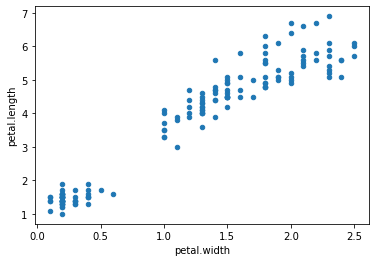

In [5]:

# Plot data
train_df.plot.scatter("petal.width", "petal.length")
plt.show()

In [6]:
# Initiate the model
mod = LinearRegression()

In [7]:
# Fit the model
mod.fit(
    X=train_df[["petal.width"]],
    y=train_df["petal.length"],
)

LinearRegression()

In [8]:

# Save the fitted model as an artifact
lineapy.save(mod, "iris_model")

LineaArtifact(name='iris_model', _version=0)

#### Making predictions

In [9]:
# Load data to predict
url2 = "https://raw.githubusercontent.com/LineaLabs/lineapy/main/examples/tutorials/data/iris.csv"
pred_df = pd.read_csv(url2)
pred_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [10]:
# Make predictions
petal_length_pred = mod.predict(X=pred_df[["petal.width"]])

In [11]:

# Save the predictions
lineapy.save(petal_length_pred, "iris_petal_length_pred")

LineaArtifact(name='iris_petal_length_pred', _version=0)

### Create a pipeline from artifacts

In [12]:

lineapy.to_pipeline(
    artifacts=["iris_model", "iris_petal_length_pred"],
    framework="SCRIPT",
    dependencies={"iris_petal_length_pred": {"iris_model"}},
    input_parameters=["url1", "url2"],  # Specify variables to parametrize
    pipeline_name="demo_script_pipeline",
    output_dir="./python_script/",
)

Generated module file: python_script/demo_script_pipeline_module.py             
Generated requirements file: python_script/demo_script_pipeline_requirements.txt
Generated Docker file: python_script/demo_script_pipeline_Dockerfile            


PosixPath('python_script')

### Validate the `to_pipeline()` output

In [13]:

%%sh
echo '--------------------------------------------------------------------'
echo 'validate lineapy has created all pipeline required files'
echo '--------------------------------------------------------------------'
ls -ltrh python_script
echo '\n'
echo '--------------------------------------------------------------------'
echo 'python module: demo_script_pipeline_module.py'
echo '--------------------------------------------------------------------'
cat python_script/demo_script_pipeline_module.py
echo '\n'
echo '--------------------------------------------------------------------'
echo 'module requirement: demo_script_pipeline_requirements.txt'
echo '--------------------------------------------------------------------'
cat python_script/demo_script_pipeline_requirements.txt

--------------------------------------------------------------------
validate lineapy has created all pipeline required files
--------------------------------------------------------------------
total 16K
drwxrwxr-x 2 mingjerli mingjerli 4.0K Sep 29 14:26 __pycache__
-rw-rw-r-- 1 mingjerli mingjerli 2.1K Sep 29 15:52 demo_script_pipeline_module.py
-rw-rw-r-- 1 mingjerli mingjerli   59 Sep 29 15:52 demo_script_pipeline_requirements.txt
-rw-rw-r-- 1 mingjerli mingjerli  335 Sep 29 15:52 demo_script_pipeline_Dockerfile


--------------------------------------------------------------------
python module: demo_script_pipeline_module.py
--------------------------------------------------------------------
import argparse

import pandas as pd
from sklearn.linear_model import LinearRegression


def get_iris_model(url1):
    train_df = pd.read_csv(url1)
    mod = LinearRegression()
    mod.fit(
        X=train_df[["petal.width"]],
        y=train_df["petal.length"],
    )
    return mod


def ge

### Execute the pipeline from the command line
 
We can re-execute the pipeline via python CLI directly.
 
```bash
python python_script/demo_script_pipeline_script_module.py
```

Since the pipeline has been parametrized, we can tune the parameters if desired. For instance, to make predictions on a different data set, we can run the following:

```bash
python python_script/demo_script_pipeline_script_module.py --url2=[NEW-DATA-URL]
```

If we need to recover the python environment, we can always run
 
```bash
pip install -r python_script/demo_script_pipeline_requirements.txt
```
 
to recover the original environment.
 
#### Setup a cron job
 
We can use crontab to schedule the pipeline by following the command (to run every hour)
 
```bash
crontab - "0 * * * * python python_script/demo_script_pipeline_script_module.py"
```
 
Note that you need to make sure that you are using the correct python environment and modify the path as the absolute path to the dag file.

### Create an Airflow pipeline

Note that, if you set the `output_dir` to your Airflow dag folder, your Airflow can pick up the dag seamlessly.
Of course, if you want to make sure the dag generated by LineaPy is reasonable or you want to add something (e.g., logging), you can make a change on the side and manually move the dag to your dag folder.

In [14]:

lineapy.to_pipeline(
    artifacts=["iris_model", "iris_petal_length_pred"],
    framework="AIRFLOW",
    dependencies={"iris_petal_length_pred": {"iris_model"}},
    input_parameters=["url1", "url2"],  # Specify variables to parametrize
    pipeline_name="demo_airflow_pipeline",
    output_dir="./airflow_pipeline/",
)

Generated module file: airflow_pipeline/demo_airflow_pipeline_module.py         
Generated requirements file:                                                    
airflow_pipeline/demo_airflow_pipeline_requirements.txt                         
Generated DAG file: airflow_pipeline/demo_airflow_pipeline_dag.py               
Generated Docker file: airflow_pipeline/demo_airflow_pipeline_Dockerfile        


PosixPath('airflow_pipeline')

In [15]:

%%sh
echo '--------------------------------------------------------------------'
echo 'validate lineapy has created all pipeline required files'
echo '--------------------------------------------------------------------'
ls -ltrh airflow_pipeline
echo '\n'
echo '--------------------------------------------------------------------'
echo 'python module: demo_airflow_pipeline_module'
echo '--------------------------------------------------------------------'
cat airflow_pipeline/demo_airflow_pipeline_module.py
echo '\n'
echo '--------------------------------------------------------------------'
echo 'pipeline script: demo_airflow_pipeline_dag'
echo '--------------------------------------------------------------------'
cat airflow_pipeline/demo_airflow_pipeline_dag.py

--------------------------------------------------------------------
validate lineapy has created all pipeline required files
--------------------------------------------------------------------
total 20K
drwxrwxr-x 2 mingjerli mingjerli 4.0K Sep 29 14:26 __pycache__
-rw-rw-r-- 1 mingjerli mingjerli 2.1K Sep 29 15:52 demo_airflow_pipeline_module.py
-rw-rw-r-- 1 mingjerli mingjerli   59 Sep 29 15:52 demo_airflow_pipeline_requirements.txt
-rw-rw-r-- 1 mingjerli mingjerli  356 Sep 29 15:52 demo_airflow_pipeline_Dockerfile
-rw-rw-r-- 1 mingjerli mingjerli 2.3K Sep 29 15:52 demo_airflow_pipeline_dag.py


--------------------------------------------------------------------
python module: demo_airflow_pipeline_module
--------------------------------------------------------------------
import argparse

import pandas as pd
from sklearn.linear_model import LinearRegression


def get_iris_model(url1):
    train_df = pd.read_csv(url1)
    mod = LinearRegression()
    mod.fit(
        X=train_df[["

## Recap

We have demonstrated that LineaPy can easily create and update your pipeline and make sure it is reproducible.
This should save a lot of time for data scientist from pipeline operation time.

To learn more about LineaPy, check out the project [documentation](https://docs.lineapy.org/en/latest/index.html).